<a href="https://www.kaggle.com/code/julianacorts/drug-classif-ml-decision-tree-and-random-forest?scriptVersionId=132982629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

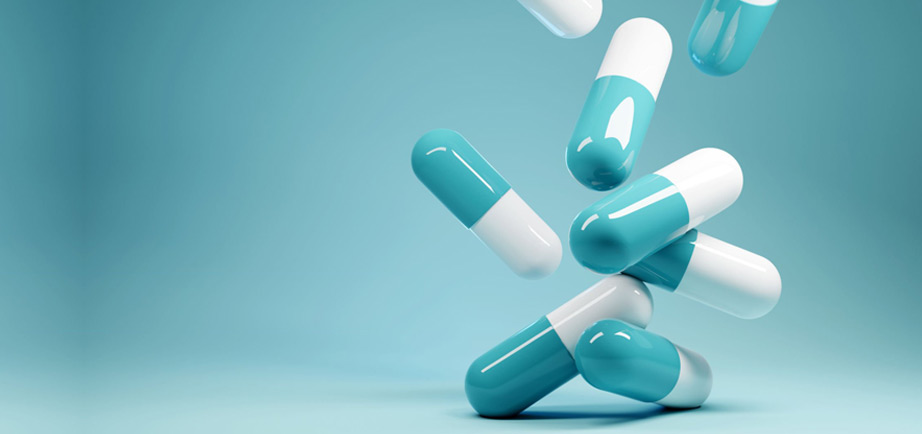

# Dataset description

Data has been collected on a group of patients, who suffered from the same disease. During their course of treatment, each patient responded to one of 5 drugs, Drug A, Drug B, Drug C, Drug X, and Drug Y.

It is then possible to build a model to find out which drug might be appropriate for a future patient with the same disease. The characteristics of this data set are age, sex, blood pressure, cholesterol of the patients, Sodium to potassium ratio in blood of the patient and the target is the drug to which each of these patients responded.

It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.

**There are 6 variables in this data set:**

4 categorical variables and 2 continuous variables.


**The feature sets are:**
* Age -> Patient Age
* Sex -> Gender of patient (male or female)
* BP -> Blood Pressure Levels of patient (high, normal, or low)
* Cholesterol -> Cholesterol Levels of patient (high or normal)
* Na_to_K -> Sodium to potassium ratio in blood of patient
* Drug -> Type of drug

# Objetives

For the development of the notebook, we will use a predictive technique through supervised learning for data analysis. This classification algorithm will be carried out through the decision tree technique.

* Develop a classification model using Decision Tree Algorithm.
* Develop an ensemble method using the Random Forest model.
* Dataset exploration using various types of data visualization.
* Implement the CRISP-DM methodology used in analytical projects.

# Exploratory Data Analysis

# 1. Import the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px
from plotly.subplots import make_subplots

#to prevent Plotly from giving blank visualizations
from plotly.offline import plot,iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
df_drug = pd.read_csv('/kaggle/input/drug200csv/drug200.csv')

# 2. Data exploration

**2.1 Data preview**

In [3]:
#view some data from the dataset
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#to know how many records and columns do we have --> 200 records, 6 columns
df_drug.shape

(200, 6)

**2.2 Data types**

In [5]:
#to know the types of the data on the dataset
df_drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**2.3 Null and NaN Data**

In [6]:
#to know the null data on the dataset
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df_drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df_drug.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

We have no null, invalid or missing values

**2.4 Duplicate values**

In [9]:
print(df_drug.duplicated())
print("Duplicate values:",df_drug.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool
Duplicate values: 0


We dont have duplicate values

# 3. Statistics visualization and relations between the data

In [10]:
#to know some statistics of all the data on the dataset, including numerical and categorical data
df_drug.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


**3.1 Distribution of categorical variables**

**Drug Type Distribution**

In [11]:
#As my objective value is the drug, I want to see how many patients took which type of drug
df_drug_counts=df_drug['Drug'].value_counts().sort_values(ascending=False).to_frame()
print(df_drug_counts)

       Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16


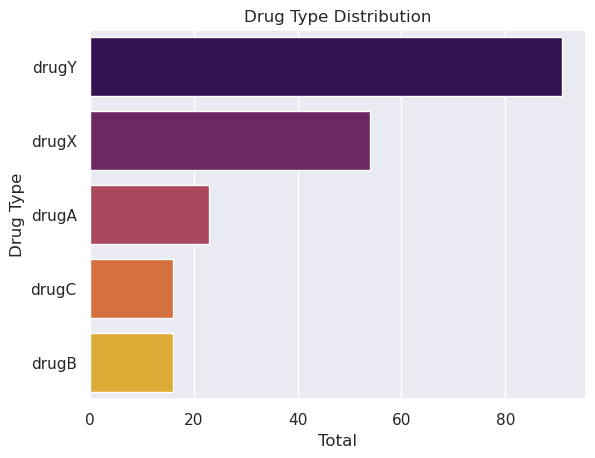

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="inferno", order=df_drug_counts.index)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.title('Drug Type Distribution')
plt.show()

The drug is an objective variable and is unbalanced.

**Gender Distribution**

In [13]:
df_drug.Sex.value_counts().to_frame()

,Sex
M,104
F,96


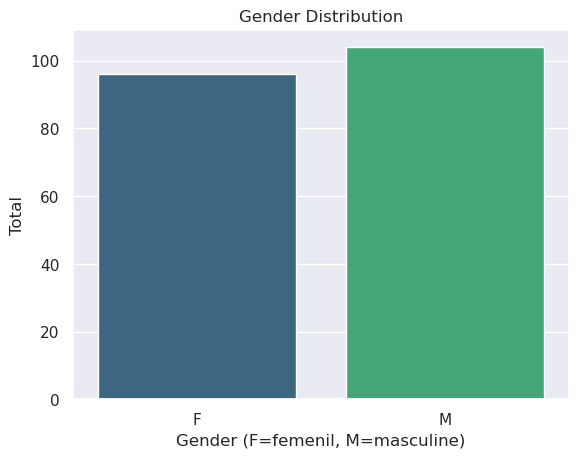

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="viridis")
plt.xlabel('Gender (F=femenil, M=masculine)')
plt.ylabel('Total')
plt.title('Gender Distribution')
plt.show()

The ratio of gender seems balanced in the data.

**Blood Pressure Distribution**

In [15]:
df_drug.BP.value_counts().to_frame()

,BP
HIGH,77
LOW,64
NORMAL,59


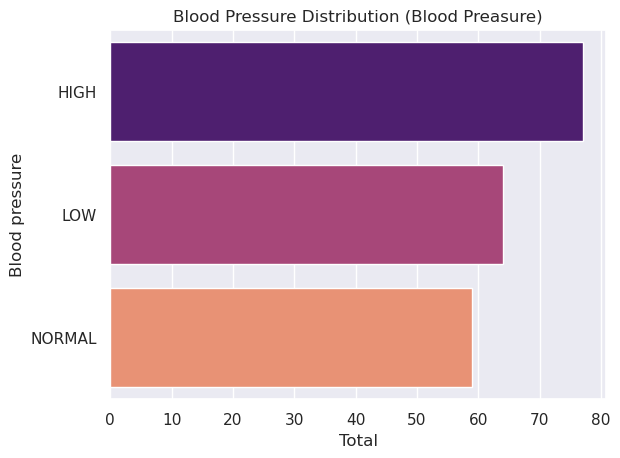

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="magma")
plt.ylabel('Blood pressure')
plt.xlabel('Total')
plt.title('Blood Pressure Distribution (Blood Preasure)')
plt.show()

**Cholesterol Distribution**

In [17]:
df_drug.Cholesterol.value_counts().to_frame()

,Cholesterol
HIGH,103
NORMAL,97


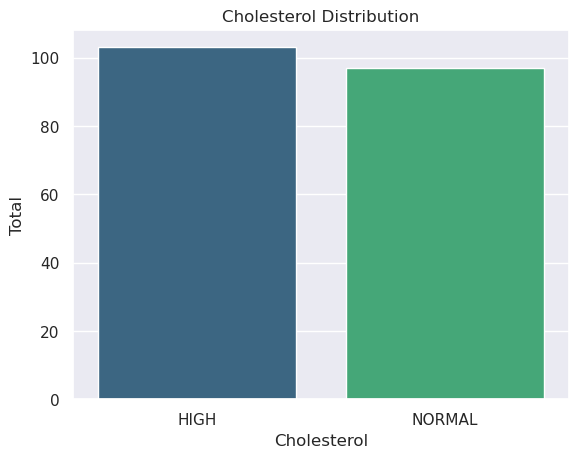

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="viridis")
plt.ylabel('Total')
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution')
plt.show()

Cholesterol is a balanced data.

**Blood Pressure Distribution based on Cholesetrol**

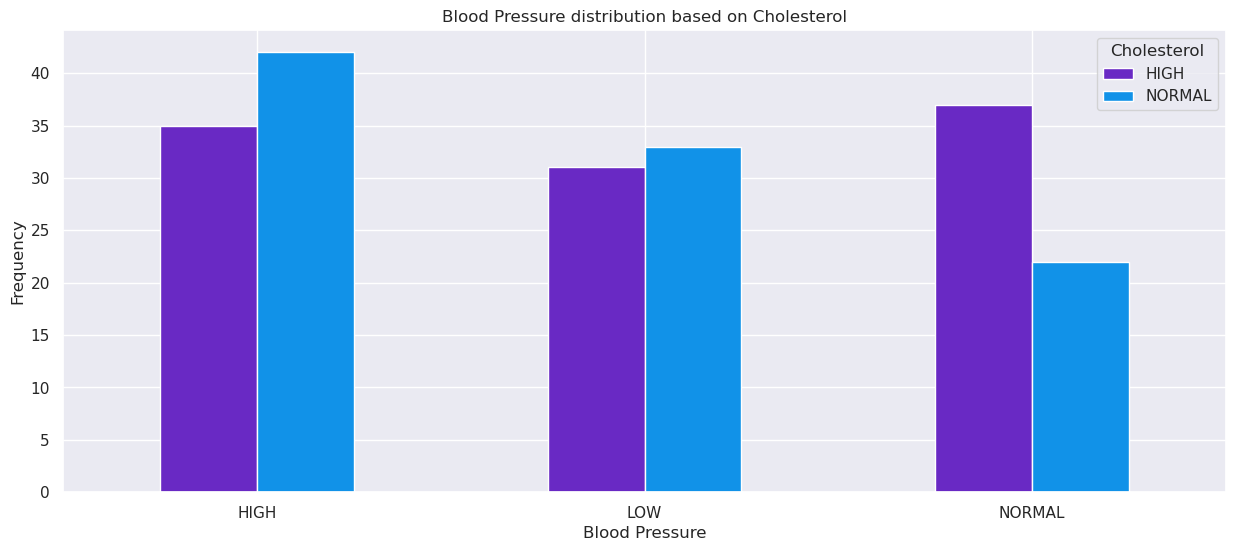

In [19]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**3.2 Distribution of numerical variables**

**Age Distribution**

In [20]:
print("Max Age:", df_drug.Age.max())
print("Min Age:", df_drug.Age.min())

Max Age: 74
Min Age: 15


[Text(0.5, 1.0, 'Age Distribution')]

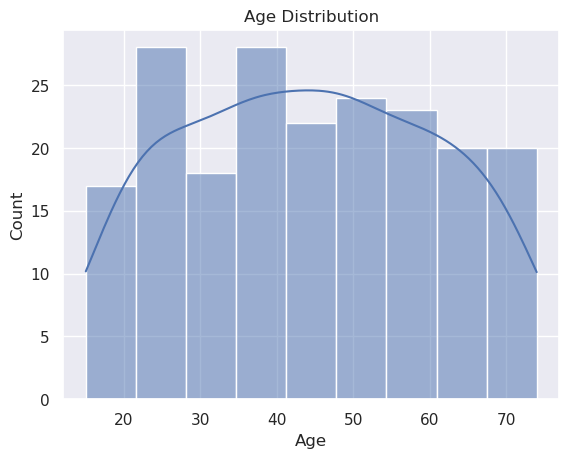

In [21]:
sns.histplot(data=df_drug, x="Age", kde=True).set(title='Age Distribution')

<Axes: ylabel='Age'>

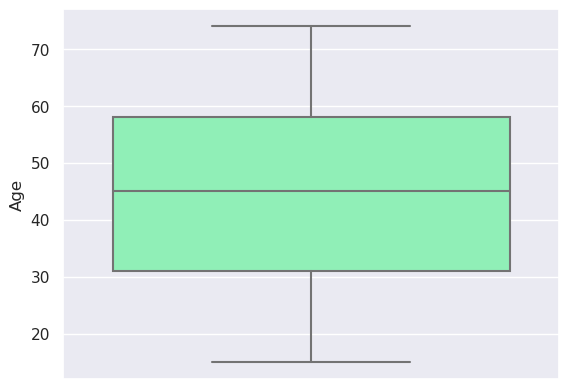

In [22]:
sns.boxplot(y="Age", data=df_drug,palette='rainbow')

Age range is between 15 and 74. Symmetric normal distribution. No atypical values.

**Distribution of Sodium to Potassium Ratio**

In [23]:
print("Max Na_to_K:", df_drug.Na_to_K.max())
print("Min Na_to_K:", df_drug.Na_to_K.min())

Max Na_to_K: 38.247
Min Na_to_K: 6.269


[Text(0.5, 1.0, 'Distribución Na_to_K')]

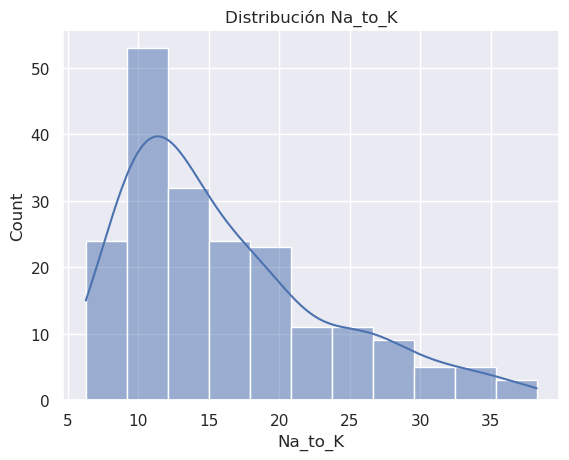

In [24]:
sns.histplot(data=df_drug, x="Na_to_K", kde=True).set(title='Distribución Na_to_K')

<Axes: ylabel='Na_to_K'>

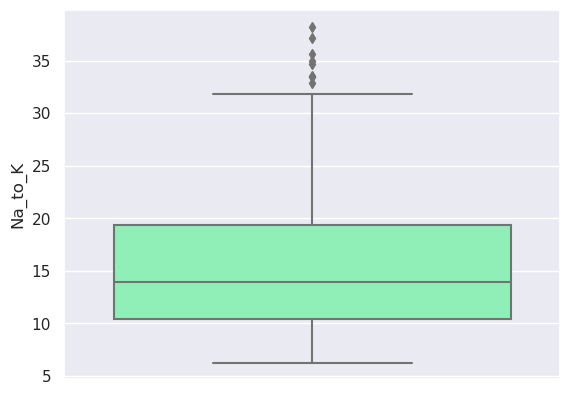

In [25]:
sns.boxplot(y="Na_to_K", data=df_drug,palette='rainbow')

Na_to_K range is between 6.269 and 38.247. Skewed asymmetric distribution with atypical values.

**Relation of Sodium to Potassium Ratio and Age, by Gender (numerical variables)**

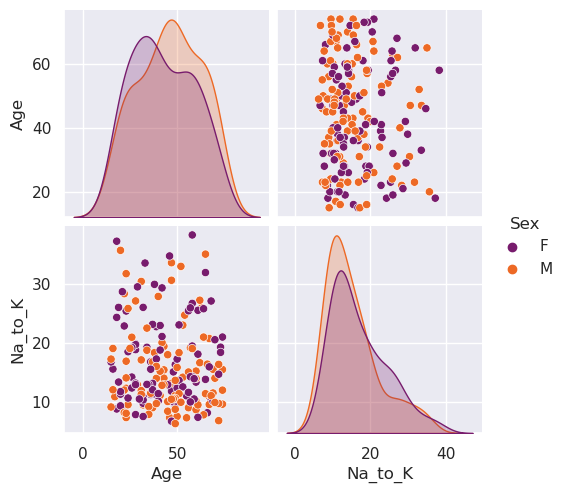

In [26]:
sns.pairplot(df_drug,hue='Sex',palette='inferno')

There is no direct relation between age and Na_to_K, in either of the two genders.

**3.3 Other Basic Data Analysis**

**Age Dispersion by Drug**

/tmp/ipykernel_20/1269806864.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



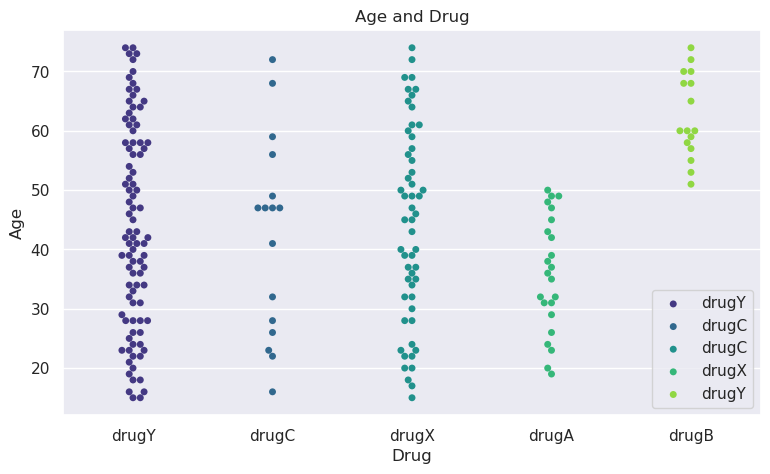

In [27]:
plt.figure(figsize = (9,5))
sns.swarmplot(x="Drug", y="Age", data=df_drug, palette='viridis')
plt.title("Age and Drug")
plt.legend(df_drug['Drug'])

In [28]:
print("Minimum Age of DrugB",df_drug.Age[df_drug.Drug == "drugB"].min())
print("Maximum Age of DrugA",df_drug.Age[df_drug.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


* DrugB is taken only by older than 51 years old.
* DrugA is taken only by younger than 50 years old.

**Gender Distribution by Drug**

In [29]:
df_drug_f=df_drug[df_drug['Sex']=='F'].value_counts()
df_drug_m=df_drug[df_drug['Sex']=='M'].value_counts()

#subplot donut heroes and villains by race
fig=make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_drug['Drug'], values=df_drug_m, name="Masculine"),
              1, 1)
fig.add_trace(go.Pie(labels=df_drug['Drug'], values=df_drug_f, name="Femenil"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Gender Distribution based on Drug Type",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Masculine', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Femenil', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

* Male people get drugA and drugC more than femenil people.
* Female people get drugB and drugX  more than male people.
* DrugY seems equal for male and female people.
* According to this graphs, Sex feature is not an important feature for classification.

**Blood Pressure Distribution by Drug**

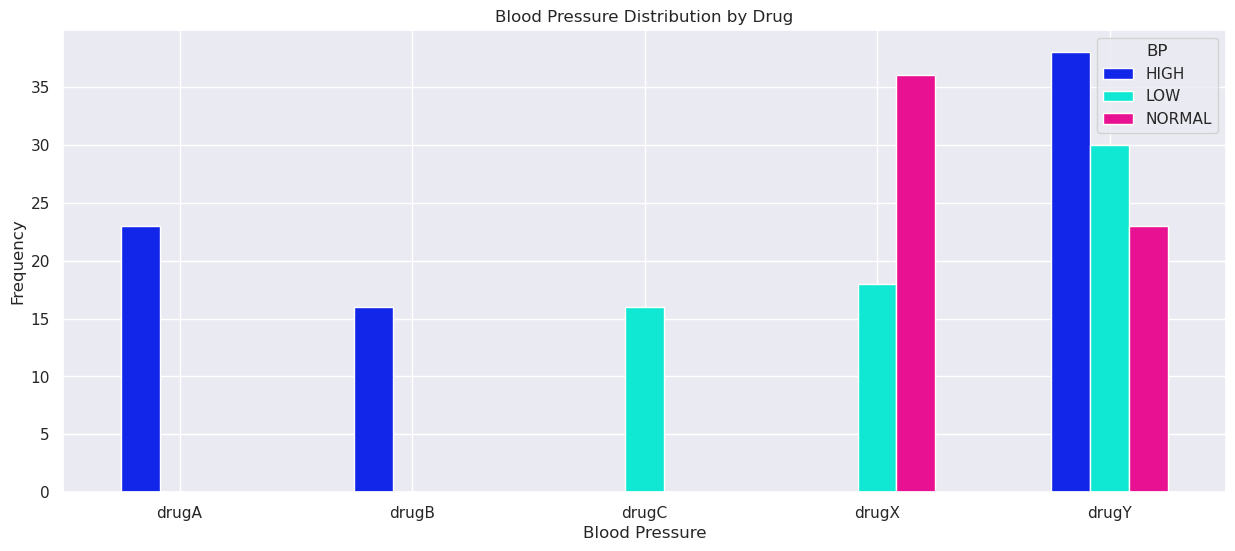

In [30]:
pd.crosstab(df_drug.Drug,df_drug.BP).plot(kind="bar",figsize=(15,6),color=['#1126e8','#11e8d3', '#e81192'])
plt.title('Blood Pressure Distribution by Drug')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

* DrugA and DrugB are only given to people who have HIGH blood pressure.
* DrugC is only given to people who have LOW blood pressure.
* DrugX is given to people who have LOW and NORMAL(higher proportion) blood pressure.
* All patients no matter their BP can take the drugY.
* BP is an important feature for classification.

**Sodium to Potassium Ratio Dispersion by Drug**

/tmp/ipykernel_20/2648597192.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



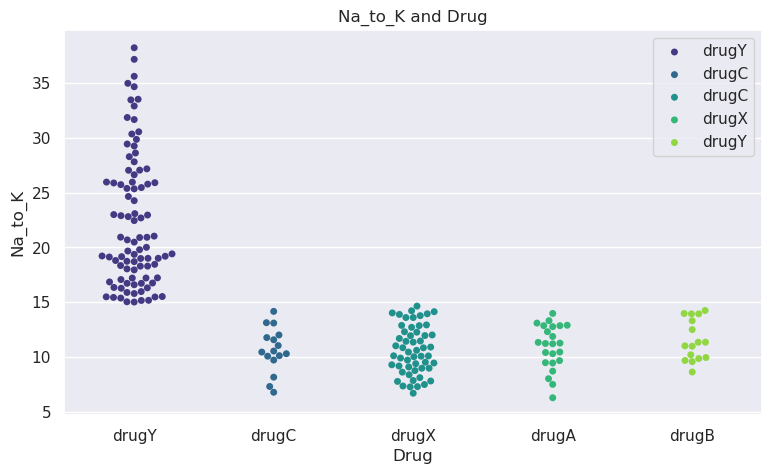

In [31]:
plt.figure(figsize = (9,5))
sns.swarmplot(x="Drug", y="Na_to_K", data=df_drug, palette='viridis')
plt.title("Na_to_K and Drug")
plt.legend(df_drug['Drug'])

In [32]:
print("Minimum Na_to_K for DrugY:",df_drug.Na_to_K[df_drug.Drug == "drugY"].min())
print("Maximum Na_to_K for DrugC:",df_drug.Na_to_K[df_drug.Drug == "drugC"].max())
print("Maximum Na_to_K for DrugX:",df_drug.Na_to_K[df_drug.Drug == "drugX"].max())
print("Maximum Na_to_K for DrugA:",df_drug.Na_to_K[df_drug.Drug == "drugA"].max())
print("Maximum Na_to_K for DrugB:",df_drug.Na_to_K[df_drug.Drug == "drugB"].max())

Minimum Na_to_K for DrugY: 15.015
Maximum Na_to_K for DrugC: 14.16
Maximum Na_to_K for DrugX: 14.642
Maximum Na_to_K for DrugA: 13.972
Maximum Na_to_K for DrugB: 14.239


* People who have Na_to_K ratio bigger or equal than 15.015, get DrugY.
* Peple who have Na_to_K ratio smaller or equal than 14.642, can get DrugC, DrugX, DrugA or DrugB.

**Cholesterol Distribution by Drug**

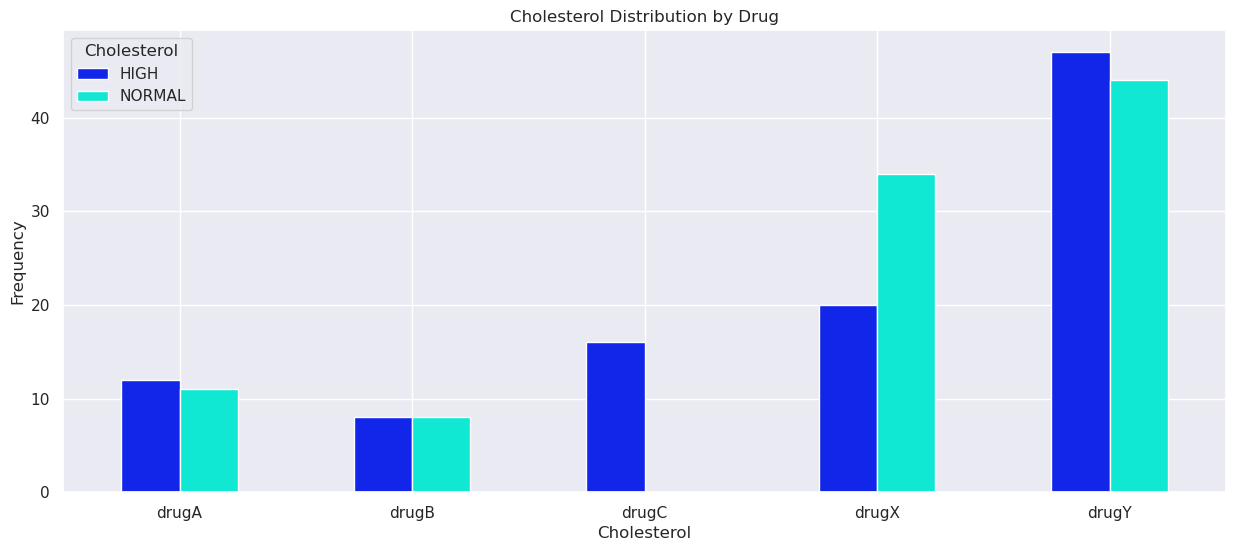

In [33]:
pd.crosstab(df_drug.Drug,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#1126e8','#11e8d3', '#e81192'])
plt.title('Cholesterol Distribution by Drug')
plt.xlabel('Cholesterol')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

* The people with HIGH cholesterol, only can take the drugC.
* It looks likes no matter if they have the cholesterol HIGH or NORMAL, they can take the drugA, drugB, drugX and drugY.
* Cholesterol is an important feature for classification.

**Blood Pressure and Na_to_K by Drug**

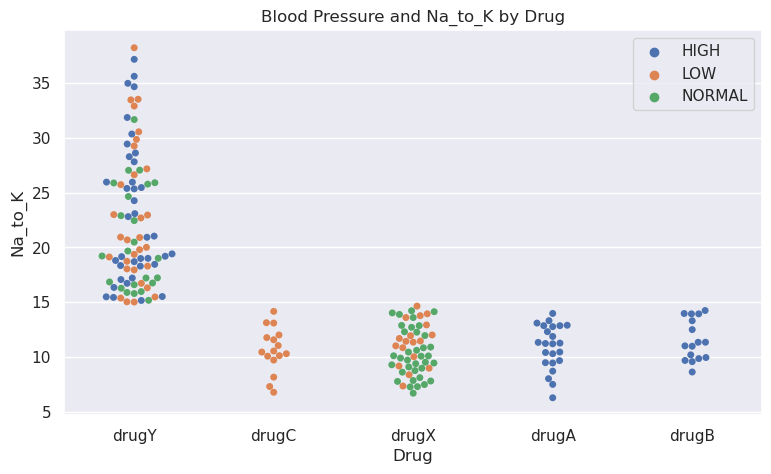

In [34]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df_drug)
plt.legend()
plt.title("Blood Pressure and Na_to_K by Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15, they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15, they get drugC only.
* The drugX is not taken by people how have HIGH blood pressure.

**Cholesterol and Na_to_K by Drug**

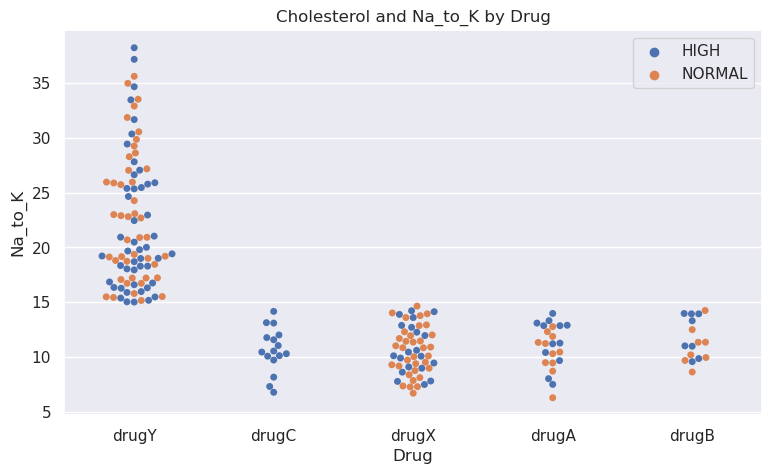

In [35]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="Cholesterol",data = df_drug)
plt.legend()
plt.title("Cholesterol and Na_to_K by Drug")
plt.show()

* If people have HIGH cholesterol and Na_to_K ratio is lower than 15, they get drugC only.
* The drugC is not taken by people who have NORMAL cholesterol.

# 4. Prepare the data

In [36]:
print("The Sex values are: \n",df_drug["Sex"].value_counts())
print("The Blood Preasure values are: \n",df_drug["BP"].value_counts())
print("The Cholesterol values are: \n",df_drug["Cholesterol"].value_counts())

The Sex values are: 
 M    104
F     96
Name: Sex, dtype: int64
The Blood Preasure values are: 
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
The Cholesterol values are: 
 HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


**4.1 Numericize**

In [37]:
#Some variables in this data set are categorical and others are numeric. 
#Sklearn Decision Trees does not handle categorical variables. 
#Therefore we must convert these variables into numerical values, we must Numericize them.

#Data before converting to numbers
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [38]:
from sklearn import preprocessing

#Converting to numbers variable Sex
pre_sex = preprocessing.LabelEncoder()
pre_sex.fit(['M','F'])
df_drug.Sex= pre_sex.transform(df_drug.Sex)

#Converting to numbers variable BP
pre_BP = preprocessing.LabelEncoder()
pre_BP.fit(['LOW', 'NORMAL', 'HIGH'])
df_drug.BP= pre_BP.transform(df_drug.BP)

#Converting to numbers variable Cholesterol
pre_cho = preprocessing.LabelEncoder()
pre_cho.fit(['NORMAL', 'HIGH'])
df_drug.Cholesterol= pre_cho.transform(df_drug.Cholesterol)

df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [39]:
print("The Sex values are: \n",df_drug["Sex"].value_counts())
print("The Blood Preasure values are: \n",df_drug["BP"].value_counts())
print("The Cholesterol values are: \n",df_drug["Cholesterol"].value_counts())

The Sex values are: 
 1    104
0     96
Name: Sex, dtype: int64
The Blood Preasure values are: 
 0    77
1    64
2    59
Name: BP, dtype: int64
The Cholesterol values are: 
 0    103
1     97
Name: Cholesterol, dtype: int64


In [40]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [41]:
#We will divide the dataset into features and the target variable

df_predictors=['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K']
df_x = df_drug[df_predictors] # Features which corresponds to the predictor variables
df_y = df_drug.Drug # Target variable

**4.2 Split the dataset into Training and Test**

In [42]:
#Let's split our dataset into training and test sets.
#70% of the entire dataset will be used for training and 30% for testing.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

#to be able to see the shape of the shuffle sets for training and test.
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (140, 5)
x_test shape: (60, 5)
y_train shape: (140,)
y_test shape: (60,)


# 5. Model Implementation

# 5.1 Decision Tree (Classifier Model)

**5.1.1 Training the decision tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree (Empty Object)
drugTree=DecisionTreeClassifier(criterion="entropy", max_depth = 5)

#Train the decision tree
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

**5.1.2 Test the decision tree**

In [44]:
#Let's make some predictions on the testing dataset and store it into a variable called predTree.
y_pred = drugTree.predict(x_test)

print (y_pred [0:5])

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']


In [45]:
print (y_test [0:5])

58     drugX
40     drugY
34     drugX
102    drugC
184    drugY
Name: Drug, dtype: object


**5.1.3 Evaluation the decision tree**

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
drugTreeAcc=accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(drugTreeAcc*100))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

Decision Tree accuracy is: 96.67%


Matriz de confusión: 
 [[ 4  2  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


<Axes: >

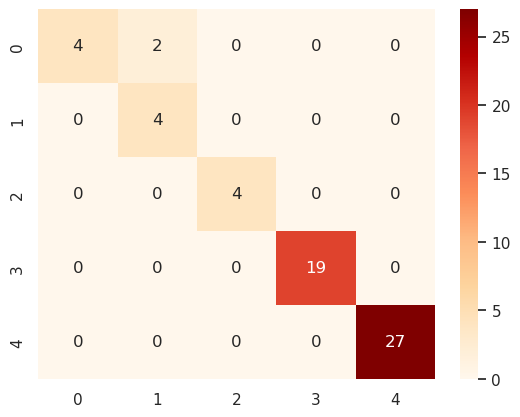

In [47]:
print("Matriz de confusión: \n", confusion_matrix(y_pred, y_test))
cm = np.array(confusion_matrix(y_pred, y_test))
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')

**5.1.4 Visialization the decision tree**

In [48]:
from sklearn import tree
#First we will visualize the number of nodes
n_nodes=drugTree.tree_.node_count
print("The constructed tree has ", n_nodes, "nodes")

#Now we will visualize the tree in text mode
g_tree=tree.export_text(drugTree, feature_names=list(df_x.columns), show_weights=True)
print(g_tree)

The constructed tree has  11 nodes
|--- Na_to_K <= 14.84
|   |--- BP <= 0.50
|   |   |--- Age <= 53.00
|   |   |   |--- weights: [19.00, 0.00, 0.00, 0.00, 0.00] class: drugA
|   |   |--- Age >  53.00
|   |   |   |--- weights: [0.00, 10.00, 0.00, 0.00, 0.00] class: drugB
|   |--- BP >  0.50
|   |   |--- BP <= 1.50
|   |   |   |--- Cholesterol <= 0.50
|   |   |   |   |--- weights: [0.00, 0.00, 12.00, 0.00, 0.00] class: drugC
|   |   |   |--- Cholesterol >  0.50
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 13.00, 0.00] class: drugX
|   |   |--- BP >  1.50
|   |   |   |--- weights: [0.00, 0.00, 0.00, 22.00, 0.00] class: drugX
|--- Na_to_K >  14.84
|   |--- weights: [0.00, 0.00, 0.00, 0.00, 64.00] class: drugY



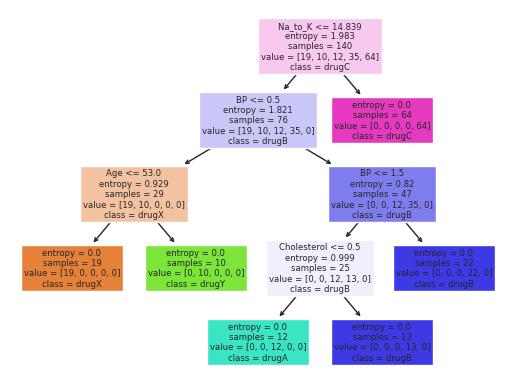

In [49]:
#Now we will visualize the tree graphically
tree.plot_tree(drugTree, class_names=['drugX','drugY','drugA','drugB','drugC'], filled=True, feature_names=list(df_x.columns))
plt.show()

# 5.2 Random Forest  (Ensemble Method)

**5.2.1 Training the random forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier

#Create the classifier
RFclassifier=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)

#Train the Random Forest
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)

**5.2.2 Test the random forest**

In [51]:
#Predict the target variable on the test data (test the model)
y_pred=RFclassifier.predict(x_test)

print (y_pred [0:5])

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']


**5.2.3 Evaluation the random forest**

In [52]:
print(classification_report(y_test, y_pred))

RFclassifierAcc=accuracy_score(y_test, y_pred)
print('Random Forest accuracy is: {:.2f}%'.format(RFclassifierAcc*100))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      0.75      0.86         4
       drugX       0.95      1.00      0.97        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.95        60
   macro avg       0.92      0.88      0.89        60
weighted avg       0.96      0.95      0.95        60

Random Forest accuracy is: 95.00%


Matriz de confusión: 
 [[ 4  2  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  1 19  0]
 [ 0  0  0  0 27]]


<Axes: >

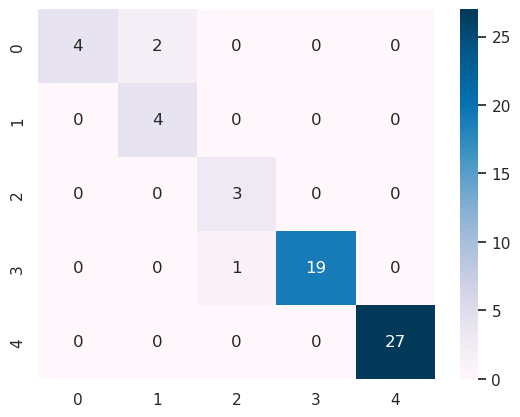

In [53]:
print("Matriz de confusión: \n", confusion_matrix(y_pred, y_test))
cm2 = np.array(confusion_matrix(y_pred, y_test))
sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = 'PuBu', fmt = 'g')

In [54]:
importance = RFclassifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFclassifier.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

print("Importance of attributes:")

for f in range(df_x.shape[1]):
    print("%s: atributo %d (%f)" % (df_x.columns.values[indices[f]-1], indices[f], importance[indices[f]]))
  

Importance of attributes:
Cholesterol: atributo 4 (0.540333)
Sex: atributo 2 (0.246028)
Na_to_K: atributo 0 (0.141085)
BP: atributo 3 (0.057511)
Age: atributo 1 (0.015043)


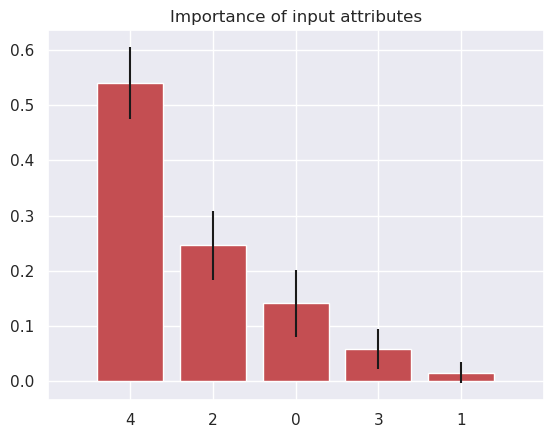

In [55]:
#Graph the importance
plt.figure()
plt.title("Importance of input attributes")
plt.bar(range(df_x.shape[1]), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

* The 3 most important attributes were Cholesterol, Sex and Sodium Potassium ratio in blood.
* The 2 less important attributes were Blood Pressure and Age.

# 6. Conclusions

In [56]:
compare=pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'], 
                        'Accuracy': [drugTreeAcc*100, RFclassifierAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Decision Tree,96.666667
1,Random Forest,95.000000


**Descriptive Analysis:**
* There is no direct relation between age and Na_to_K, in either of the two genders.
* DrugB is taken only by older than 51 years old.
* DrugA is taken only by younger than 50 years old.
* Male people get drugA and drugC more than femenil people.
* Female people get drugB and drugX more than male people.
* DrugY seems equal for male and female people.
* DrugA and DrugB are only given to people who have HIGH blood pressure.
* DrugC is only given to people who have LOW blood pressure.
* DrugX is given to people who have LOW and NORMAL(higher proportion) blood pressure.
* All patients no matter their BP can take the drugY.
* People who have Na_to_K ratio bigger or equal than 15.015, get DrugY.
* Peple who have Na_to_K ratio smaller or equal than 14.642, can get DrugC, DrugX, DrugA or DrugB.
* The people with HIGH cholesterol, only can take the drugC.
* It looks likes no matter if they have the cholesterol HIGH or NORMAL, they can take the drugA, drugB, drugX and drugY.
* If people have HIGH blood pressure and Na_to_K ratio is lower than 15, they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15, they get drugC only.
* The drugX is not taken by people how have HIGH blood pressure.
* If people have HIGH cholesterol and Na_to_K ratio is lower than 15, they get drugC only.
* The drugC is not taken by people who have NORMAL cholesterol.

**Predictive Analysis:**
* The 3 most important attributes were Cholesterol, Sex and Sodium Potassium ratio in blood.
* The 2 less important attributes were Blood Pressure and Age.
* Based on the results, it can be said that both ML models have an accuracy of more than 95% in predicting classification of drug type.
* The choice model were decision tree, because it has more accuracy.

Inspired by:

https://www.kaggle.com/code/gorkemgunay/drug-classification-with-different-algorithms

https://www.kaggle.com/code/mwaseem75/classification-model-using-decision-tree

https://www.kaggle.com/code/caesarmario/drug-classification-w-various-ml-models/notebook#6.-Dataset-Preparation-%E2%9A%99

*I'm still learning, any suggestions or comments to improve will be appreciated! If you liked it and have any recommendations for other datasets I should look at, let me know in the comments ! Thanks for the support! :)*

**Connect with me:** https://www.linkedin.com/in/julianacortesarboleda/